# 선릉역 반경 150m 데이터셋에 유동인구 추가

## 모듈 import

In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from xgboost import XGBRegressor
#from lightgbm import LGBRegressor

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
from matplotlib import rc

# 시각화 그래프 '-' & 한글 깨짐 현상 처리
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc

mpl.rcParams['axes.unicode_minus'] = False
font_name = fm.FontProperties(fname='c:\\windows\\fonts\\malgun.ttf').get_name()
rc('font', family=font_name)

# 경고메시지 숨김
import warnings
warnings.filterwarnings(action='ignore')
# 경고메시지 다시 보이게
#warnings.filterwarnings(action='default')

## 데이터 로드

### 선릉역 반경 150m 유동인구 데이터

In [3]:
flow_pop = pd.read_csv('data/T-Money/flow_pop.csv',index_col ='flow_time',parse_dates=True)
flow_pop.head(10)

,pop
flow_time,
2019-02-01 00:00:00,553.63
2019-02-01 01:00:00,412.27
2019-02-01 02:00:00,371.93
2019-02-01 03:00:00,256.83
2019-02-01 04:00:00,242.47
2019-02-01 05:00:00,1194.04
2019-02-01 06:00:00,3542.02
2019-02-01 07:00:00,10230.07
2019-02-01 08:00:00,11625.68


### 선릉역 반경 150m 택시승차 데이터

In [6]:
taxi = pd.read_csv('data/T-Money/seolleung_dataset.csv',index_col ='o_time',parse_dates=True)
taxi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4368 entries, 2018-10-01 00:00:00 to 2019-03-31 23:00:00
Data columns (total 12 columns):
yesterday        4368 non-null int64
today            4368 non-null int64
tomorrow         4368 non-null int64
temp             4368 non-null float64
windspeed        4368 non-null float64
humidity         4368 non-null int64
cloud            4368 non-null float64
precipitation    4368 non-null float64
snowcover        4368 non-null float64
visibility       4368 non-null int64
user             4368 non-null float64
count            4368 non-null int64
dtypes: float64(6), int64(6)
memory usage: 443.6 KB


## 선릉역 반경 150m 택시승차 데이터에 유동인구 컬럼 추가

In [7]:
join = pd.merge(taxi,flow_pop, left_on=taxi.index,right_on=flow_pop.index)
join.rename(columns={'key_0':'o_time'},inplace=True)
join
join = join[['o_time','yesterday','today','tomorrow','temp','windspeed','humidity',\
             'cloud','precipitation','snowcover','visibility','user','pop','count']]
join

,o_time,yesterday,today,tomorrow,temp,windspeed,humidity,cloud,precipitation,snowcover,visibility,user,pop,count
0,2018-10-01 00:00:00,1,0,0,14.1,2.6,55,0.0,0.0,0.0,2000,1.0,299.31,52
1,2018-10-01 01:00:00,1,0,0,13.9,2.0,57,2.0,0.0,0.0,2000,1.0,196.59,17
2,2018-10-01 02:00:00,1,0,0,13.9,2.4,56,4.0,0.0,0.0,2000,1.0,173.37,10
3,2018-10-01 03:00:00,1,0,0,13.6,1.6,56,8.0,0.0,0.0,2000,1.0,131.52,13
4,2018-10-01 04:00:00,1,0,0,13.7,1.9,56,10.0,0.0,0.0,2000,1.0,254.17,12
5,2018-10-01 05:00:00,1,0,0,13.7,1.8,57,8.0,0.0,0.0,1999,1.0,1430.63,8
6,2018-10-01 06:00:00,1,0,0,13.3,2.3,56,7.0,0.0,0.0,2000,1.0,4227.82,14
7,2018-10-01 07:00:00,1,0,0,13.1,2.1,58,3.0,0.0,0.0,1997,1.0,12881.29,31
8,2018-10-01 08:00:00,1,0,0,13.7,2.4,54,7.0,0.0,0.0,1960,1.0,15716.97,148
9,2018-10-01 09:00:00,1,0,0,14.9,3.4,50,1.0,0.0,0.0,1989,1.0,8038.56,130


## 데이터 저장

In [8]:
join.to_csv('data/T-Money/seolleung_dataset_add_pop.csv', index=False)

## 유동인구 데이터 시각화

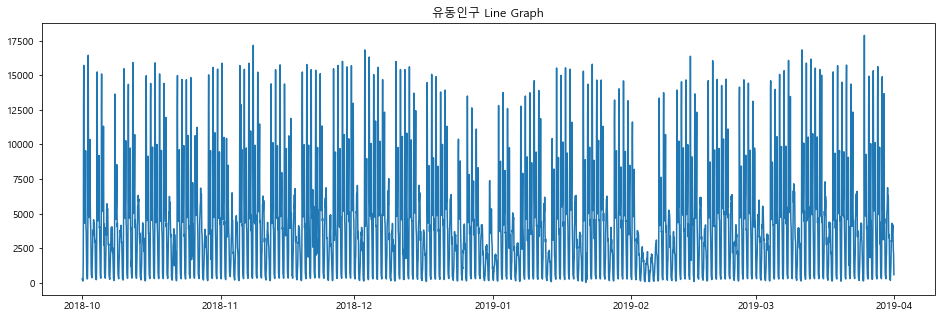

In [26]:
plt.figure(figsize=(16,5))
plt.title('유동인구 Line Graph')
plt.plot(join['o_time'],join['pop'])
plt.show()

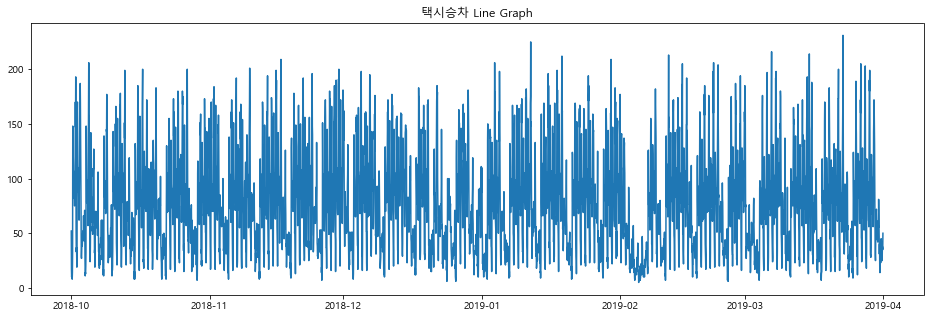

In [27]:
plt.figure(figsize=(16,5))
plt.title('택시승차 Line Graph')
plt.plot(join['o_time'],join['count'])
plt.show()

## 상관관계 HeatMap

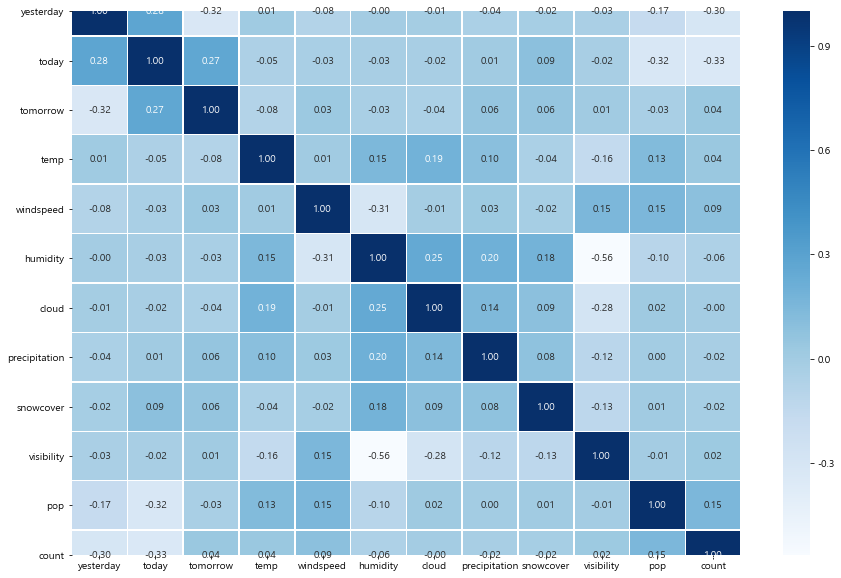

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(data = join.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')